# 1. XGBOOST with Keras

- 참조 링크 :[link](https://lsjsj92.tistory.com/547)
- 참조 링크2:[link](https://github.com/lsjsj92/machine_learning_basic/blob/master/009.%20XGboost%2C%20LightGBM.ipynb)

- XGBOOST 특징
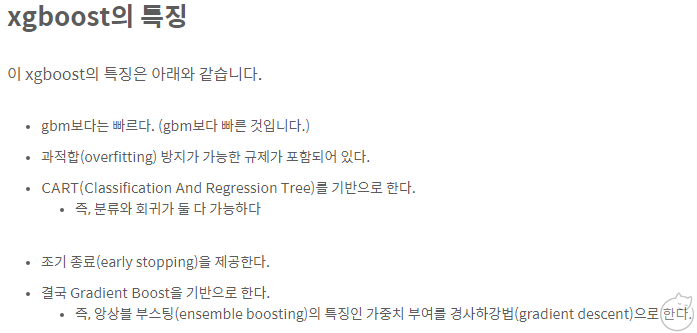

- 일반적인 Gradient Boosting과 다른 점은 먼저 규제(regularization)이 있다는 것입니다. 이러한 규제는 모델의 overfitting을 방지하는데 사용되는 매우매우 유용한 방법입니다.

In [1]:
from xgboost import plot_importance
from xgboost import XGBClassifier

In [2]:
! python -m pip install xgboost # ! 이후 cmd 실행과 동일한 기능

ERROR: Invalid requirement: '#'
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## 1-1) Get the data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\82102\Anaconda3\envs\chicken\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.datasets import load_breast_cancer

In [6]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [7]:
raw_data = pd.DataFrame(data.data, columns=data.feature_names)
raw_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
raw_data['target'] = data.target
raw_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [9]:
help(raw_data.all)

Help on method all in module pandas.core.frame:

all(axis=0, bool_only=None, skipna=True, level=None, **kwargs) method of pandas.core.frame.DataFrame instance
    Return whether all elements are True, potentially over an axis.
    
    Returns True unless there at least one element within a series or
    along a Dataframe axis that is False or equivalent (e.g. zero or
    empty).
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns', None}, default 0
        Indicate which axis or axes should be reduced.
    
        * 0 / 'index' : reduce the index, return a Series whose index is the
          original column labels.
        * 1 / 'columns' : reduce the columns, return a Series whose index is the
          original index.
        * None : reduce all axes, return a scalar.
    
    bool_only : bool, default None
        Include only boolean columns. If None, will attempt to use everything,
        then use only boolean data. Not implemented for Series.
    skipna 

In [10]:
help(raw_data.any)

Help on method any in module pandas.core.frame:

any(axis=0, bool_only=None, skipna=True, level=None, **kwargs) method of pandas.core.frame.DataFrame instance
    Return whether any element is True, potentially over an axis.
    
    Returns False unless there at least one element within a series or
    along a Dataframe axis that is True or equivalent (e.g. non-zero or
    non-empty).
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns', None}, default 0
        Indicate which axis or axes should be reduced.
    
        * 0 / 'index' : reduce the index, return a Series whose index is the
          original column labels.
        * 1 / 'columns' : reduce the columns, return a Series whose index is the
          original index.
        * None : reduce all axes, return a scalar.
    
    bool_only : bool, default None
        Include only boolean columns. If None, will attempt to use everything,
        then use only boolean data. Not implemented for Series.
    s

In [11]:
data = {'first_set': [1,2,3,4,5,np.nan,6,7,np.nan,np.nan,8,9,10,np.nan],
        'second_set': ['a','b',np.nan,np.nan,'c','d','e',np.nan,np.nan,'f','g',np.nan,'h','i']
        }

df = pd.DataFrame(data,columns=['first_set','second_set'])

nan_values = df[df.isnull().any(axis=1)]

print (nan_values)

    first_set second_set
2         3.0        NaN
3         4.0        NaN
5         NaN          d
7         7.0        NaN
8         NaN        NaN
9         NaN          f
11        9.0        NaN
13        NaN          i


In [12]:
nan_values2 = df[df.isnull().all(axis=1)]
nan_values2

,first_set,second_set
8,NaN,NaN


In [13]:
raw_data[raw_data.isnull().any(axis=1)]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target


In [14]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise the

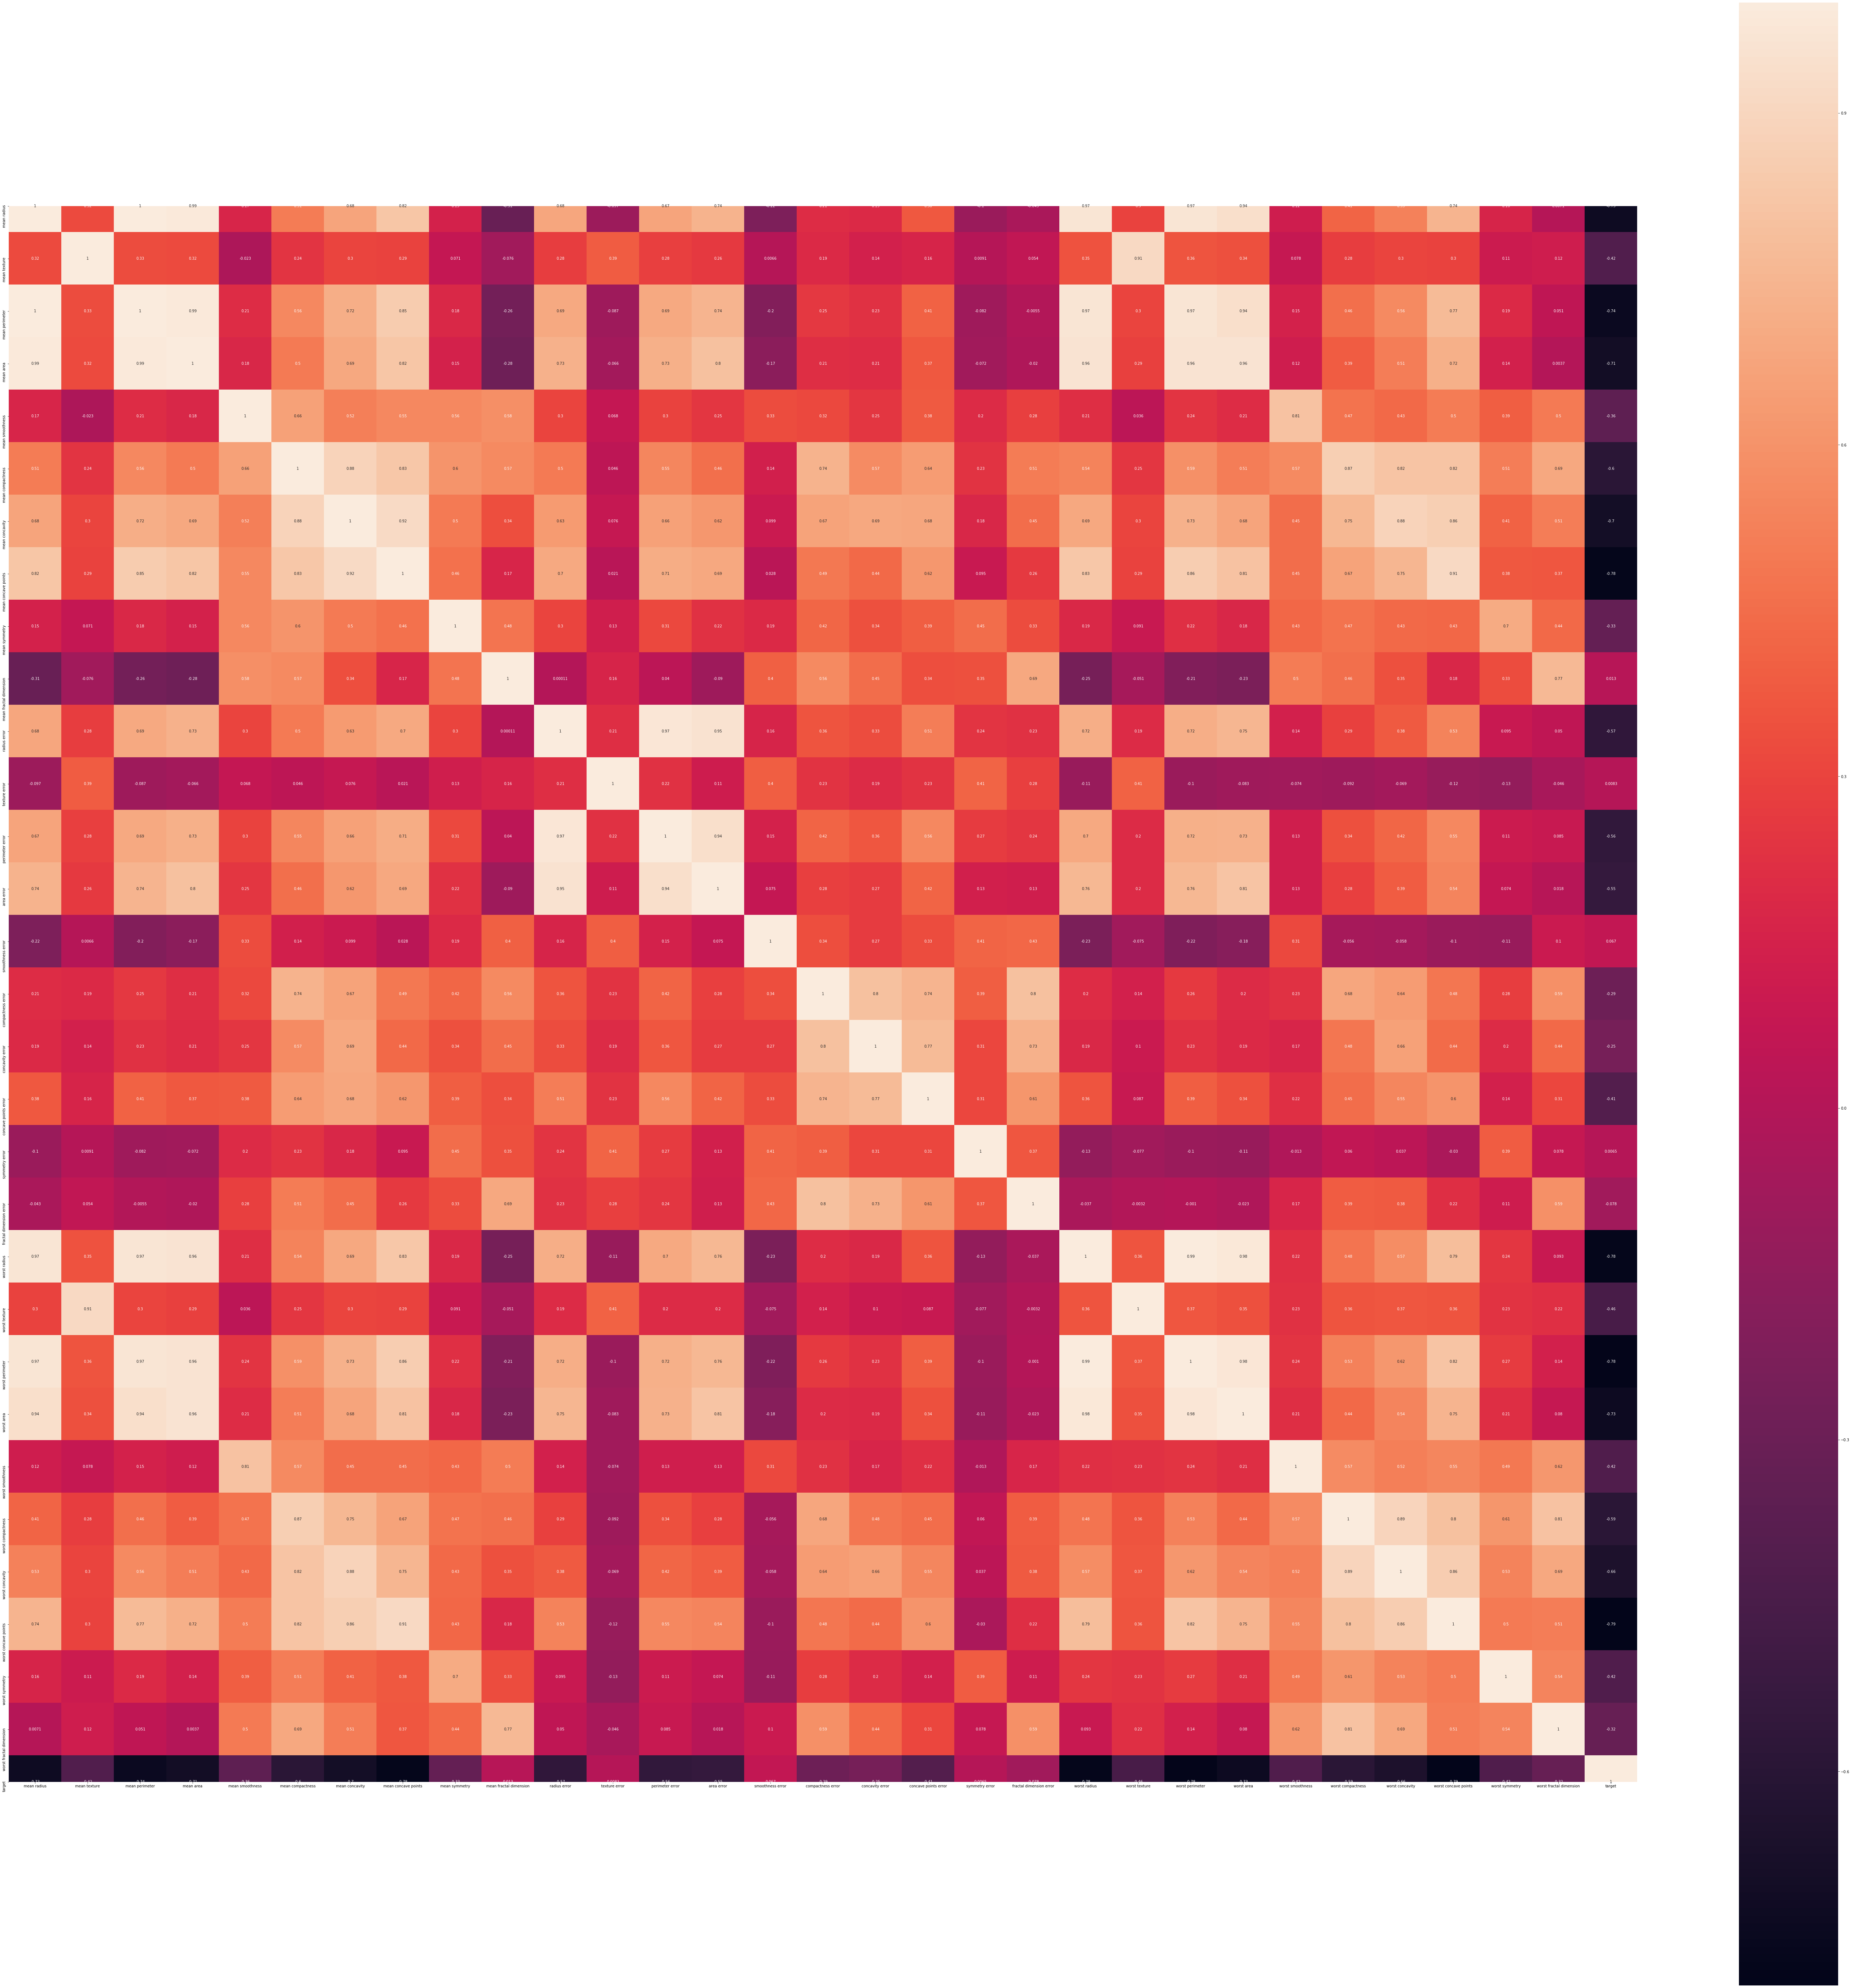

In [15]:
plt.figure(figsize=(100,100))
sns.heatmap(
    #cmap=plt.cm.viridis,
    data=raw_data.corr(),
    annot=True,
    square=True,
)
plt.show()

In [16]:
corr_data = raw_data.corr()
corr_data = abs(corr_data)
corr_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
mean smoothness,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
mean fractal dimension,0.311631,0.076437,0.261477,0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,0.051269,0.205151,0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [17]:
help(corr_data.sort_index)

Help on method sort_index in module pandas.core.frame:

sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, ignore_index: bool = False) method of pandas.core.frame.DataFrame instance
    Sort object by labels (along an axis).
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        The axis along which to sort.  The value 0 identifies the rows,
        and 1 identifies the columns.
    level : int or level name or list of ints or list of level names
        If not None, sort on values in specified index level(s).
    ascending : bool, default True
        Sort ascending vs. descending.
    inplace : bool, default False
        If True, perform operation in-place.
    kind : {'quicksort', 'mergesort', 'heapsort'}, default 'quicksort'
        Choice of sorting algorithm. See also ndarray.np.sort for more
        information.  `mergesort` is the only stable algorithm. For
        Da

In [18]:
help(corr_data.sort_values)

Help on method sort_values in module pandas.core.frame:

sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False) method of pandas.core.frame.DataFrame instance
    Sort by the values along either axis.
    
    Parameters
    ----------
            by : str or list of str
                Name or list of names to sort by.
    
                - if `axis` is 0 or `'index'` then `by` may contain index
                  levels and/or column labels.
                - if `axis` is 1 or `'columns'` then `by` may contain column
                  levels and/or index labels.
    
                .. versionchanged:: 0.23.0
    
                   Allow specifying index or column level names.
    axis : {0 or 'index', 1 or 'columns'}, default 0
         Axis to be sorted.
    ascending : bool or list of bool, default True
         Sort ascending vs. descending. Specify list for multiple sort
         orders.  If this is a list of bools, must

In [19]:
res_corr_data = corr_data.sort_values(axis=1, by="target", ascending=False)
res_corr_data

,target,worst concave points,worst perimeter,mean concave points,worst radius,mean perimeter,worst area,mean radius,mean area,mean concavity,...,mean smoothness,mean symmetry,worst fractal dimension,compactness error,concavity error,fractal dimension error,smoothness error,mean fractal dimension,texture error,symmetry error
mean radius,0.730029,0.744214,0.965137,0.822529,0.969539,0.997855,0.941082,1.000000,0.987357,0.676764,...,0.170581,0.147741,0.007066,0.206000,0.194204,0.042641,0.222600,0.311631,0.097317,0.104321
mean texture,0.415185,0.295316,0.358040,0.293464,0.352573,0.329533,0.343546,0.323782,0.321086,0.302418,...,0.023389,0.071401,0.119205,0.191975,0.143293,0.054458,0.006614,0.076437,0.386358,0.009127
mean perimeter,0.742636,0.771241,0.970387,0.850977,0.969476,1.000000,0.941550,0.997855,0.986507,0.716136,...,0.207278,0.183027,0.051019,0.250744,0.228082,0.005523,0.202694,0.261477,0.086761,0.081629
mean area,0.708984,0.722017,0.959120,0.823269,0.962746,0.986507,0.959213,0.987357,1.000000,0.685983,...,0.177028,0.151293,0.003738,0.212583,0.207660,0.019887,0.166777,0.283110,0.066280,0.072497
mean smoothness,0.358560,0.503053,0.238853,0.553695,0.213120,0.207278,0.206718,0.170581,0.177028,0.521984,...,1.000000,0.557775,0.499316,0.318943,0.248396,0.283607,0.332375,0.584792,0.068406,0.200774
mean compactness,0.596534,0.815573,0.590210,0.831135,0.535315,0.556936,0.509604,0.506124,0.498502,0.883121,...,0.659123,0.602641,0.687382,0.738722,0.570517,0.507318,0.135299,0.565369,0.046205,0.229977
mean concavity,0.696360,0.861323,0.729565,0.921391,0.688236,0.716136,0.675987,0.676764,0.685983,1.000000,...,0.521984,0.500667,0.514930,0.670279,0.691270,0.449301,0.098564,0.336783,0.076218,0.178009
mean concave points,0.776614,0.910155,0.855923,1.000000,0.830318,0.850977,0.809630,0.822529,0.823269,0.921391,...,0.553695,0.462497,0.368661,0.490424,0.439167,0.257584,0.027653,0.166917,0.021480,0.095351
mean symmetry,0.330499,0.430297,0.219169,0.462497,0.185728,0.183027,0.177193,0.147741,0.151293,0.500667,...,0.557775,1.000000,0.438413,0.421659,0.342627,0.331786,0.187321,0.479921,0.128053,0.449137
mean fractal dimension,0.012838,0.175325,0.205151,0.166917,0.253691,0.261477,0.231854,0.311631,0.283110,0.336783,...,0.584792,0.479921,0.767297,0.559837,0.446630,0.688132,0.401964,1.000000,0.164174,0.345007


## 1-3) Create dataset from Raw dataset

In [20]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int or None, optional (default=None)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_s

In [21]:
Y = raw_data.target.copy()
X = raw_data.drop('target', axis=1)
# from sklearn.model_selection import train_test_split

X_Train, X_test, Y_Train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_Train.shape, Y_Train.shape, len(X_Train), len(Y_Train))
print(X_test.shape, Y_test.shape, len(X_test), len(Y_test))

X_train, X_eval, Y_train, Y_eval = train_test_split(X_Train, Y_Train, test_size=0.1)

(455, 30) (455,) 455 455
(114, 30) (114,) 114 114


## 1-4) fit XGB classifier

In [22]:
help(XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  Parameters
 |  ----------
 |  max_depth : int
 |      Maximum tree depth for base learners.
 |  learning_rate : float
 |      Boosting learning rate (xgb's "eta")
 |  n_estimators : int
 |      Number of trees to fit.
 |  verbosity : int
 |      The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
 |  silent : boolean
 |      Whether to print messages while running boosting. Deprecat

In [23]:
## 1-4) make XGB classifier
# from xgboost import plot_importance
# from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=4)

In [24]:
help(xgb.fit)

Help on method fit in module xgboost.sklearn:

fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None, sample_weight_eval_set=None, callbacks=None) method of xgboost.sklearn.XGBClassifier instance
    Fit gradient boosting classifier
    
    Parameters
    ----------
    X : array_like
        Feature matrix
    y : array_like
        Labels
    sample_weight : array_like
        Weight for each instance
    eval_set : list, optional
        A list of (X, y) pairs to use as a validation set for
        early-stopping
    sample_weight_eval_set : list, optional
        A list of the form [L_1, L_2, ..., L_n], where each L_i is a list of
        instance weights on the i-th validation set.
    eval_metric : str, callable, optional
        If a str, should be a built-in evaluation metric to use. See
        doc/parameter.rst. If callable, a custom evaluation metric. The call
        signature is func(y_predicted, y_true) wh

In [28]:
hist_xgb = xgb.fit(X_train, Y_train, eval_set=[(X_eval, Y_eval)],
    
                  )
hist_xgb

[0]	validation_0-error:0.065217
[1]	validation_0-error:0.065217
[2]	validation_0-error:0.065217
[3]	validation_0-error:0.065217
[4]	validation_0-error:0.065217
[5]	validation_0-error:0.065217
[6]	validation_0-error:0.065217
[7]	validation_0-error:0.065217
[8]	validation_0-error:0.065217
[9]	validation_0-error:0.065217
[10]	validation_0-error:0.065217
[11]	validation_0-error:0.065217
[12]	validation_0-error:0.065217
[13]	validation_0-error:0.065217
[14]	validation_0-error:0.065217
[15]	validation_0-error:0.065217
[16]	validation_0-error:0.065217
[17]	validation_0-error:0.065217
[18]	validation_0-error:0.043478
[19]	validation_0-error:0.043478
[20]	validation_0-error:0.043478
[21]	validation_0-error:0.043478
[22]	validation_0-error:0.043478
[23]	validation_0-error:0.043478
[24]	validation_0-error:0.043478
[25]	validation_0-error:0.043478
[26]	validation_0-error:0.043478
[27]	validation_0-error:0.043478
[28]	validation_0-error:0.043478
[29]	validation_0-error:0.043478
[30]	validation_0-er

[245]	validation_0-error:0.021739
[246]	validation_0-error:0.021739
[247]	validation_0-error:0.021739
[248]	validation_0-error:0.021739
[249]	validation_0-error:0.021739
[250]	validation_0-error:0.021739
[251]	validation_0-error:0.021739
[252]	validation_0-error:0.021739
[253]	validation_0-error:0.021739
[254]	validation_0-error:0.021739
[255]	validation_0-error:0.021739
[256]	validation_0-error:0.021739
[257]	validation_0-error:0.021739
[258]	validation_0-error:0.021739
[259]	validation_0-error:0.021739
[260]	validation_0-error:0.021739
[261]	validation_0-error:0.021739
[262]	validation_0-error:0.021739
[263]	validation_0-error:0.021739
[264]	validation_0-error:0.021739
[265]	validation_0-error:0.021739
[266]	validation_0-error:0.021739
[267]	validation_0-error:0.021739
[268]	validation_0-error:0.021739
[269]	validation_0-error:0.021739
[270]	validation_0-error:0.021739
[271]	validation_0-error:0.021739
[272]	validation_0-error:0.021739
[273]	validation_0-error:0.021739
[274]	validati

[486]	validation_0-error:0.021739
[487]	validation_0-error:0.021739
[488]	validation_0-error:0.021739
[489]	validation_0-error:0.021739
[490]	validation_0-error:0.021739
[491]	validation_0-error:0.021739
[492]	validation_0-error:0.021739
[493]	validation_0-error:0.021739
[494]	validation_0-error:0.021739
[495]	validation_0-error:0.021739
[496]	validation_0-error:0.021739
[497]	validation_0-error:0.021739
[498]	validation_0-error:0.021739
[499]	validation_0-error:0.021739


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## 1-5) Plot XGB results

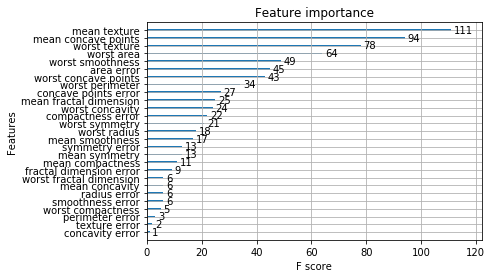

In [29]:
fig, ax = plt.subplots()
plot_importance(xgb, ax=ax)

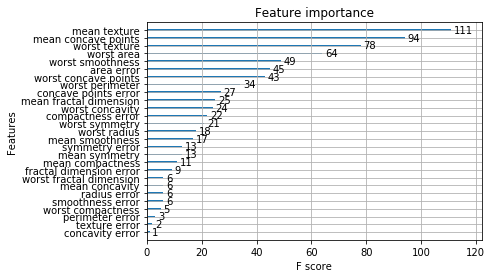

In [30]:
plot_importance(xgb)

## 1-6) return XGB results in order

In [32]:
help(xgb)

Help on XGBClassifier in module xgboost.sklearn object:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  Parameters
 |  ----------
 |  max_depth : int
 |      Maximum tree depth for base learners.
 |  learning_rate : float
 |      Boosting learning rate (xgb's "eta")
 |  n_estimators : int
 |      Number of trees to fit.
 |  verbosity : int
 |      The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
 |  silent : boolean
 |      Whether to print messages while running boosting. Depreca

In [49]:
tmp = xgb.get_booster().get_fscore()
print(sorted([(name, score) for name, score in zip(tmp.keys(), tmp.values())],
            key=lambda x: x[1], reverse=True
            ))

[('mean texture', 111), ('mean concave points', 94), ('worst texture', 78), ('worst area', 64), ('worst smoothness', 49), ('area error', 45), ('worst concave points', 43), ('worst perimeter', 34), ('concave points error', 27), ('mean fractal dimension', 25), ('worst concavity', 24), ('compactness error', 22), ('worst symmetry', 21), ('worst radius', 18), ('mean smoothness', 17), ('mean symmetry', 13), ('symmetry error', 13), ('mean compactness', 11), ('fractal dimension error', 9), ('smoothness error', 6), ('radius error', 6), ('mean concavity', 6), ('worst fractal dimension', 6), ('worst compactness', 5), ('perimeter error', 3), ('texture error', 2), ('concavity error', 1)]


## 1-6) XGB eval

In [50]:
from sklearn.metrics import accuracy_score

accuracy_score(xgb.predict(X_test), Y_test)

0.9649122807017544

In [53]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.690,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.460,18.34,114.10,809.2,0.13120,0.3635,0.3219,0.11080,0.2827,0.09208
186,18.310,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.310,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
199,14.450,20.22,94.49,642.7,0.09872,0.12060,0.11800,0.05980,0.1950,0.06466,...,18.330,30.12,117.90,1044.0,0.15520,0.4056,0.4967,0.18380,0.4753,0.10130
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.2576,0.3784,0.19320,0.3063,0.08368
359,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,0.06959,...,12.020,25.02,75.79,439.6,0.13330,0.1049,0.1144,0.05052,0.2454,0.08136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,8.726,15.83,55.84,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,0.07633,...,9.628,19.62,64.48,284.4,0.17240,0.2364,0.2456,0.10500,0.2926,0.10170
149,13.740,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.340,22.46,97.19,725.9,0.09711,0.1824,0.1564,0.06019,0.2350,0.07014
256,19.550,28.77,133.60,1207.0,0.09260,0.20630,0.17840,0.11440,0.1893,0.06232,...,25.050,36.27,178.60,1926.0,0.12810,0.5329,0.4251,0.19410,0.2818,0.10050
147,14.950,18.77,97.84,689.5,0.08138,0.11670,0.09050,0.03562,0.1744,0.06493,...,16.250,25.47,107.10,809.7,0.09970,0.2521,0.2500,0.08405,0.2852,0.09218


In [57]:
X_test.iloc[0, :]

mean radius                 14.690000
mean texture                13.980000
mean perimeter              98.220000
mean area                  656.100000
mean smoothness              0.103100
mean compactness             0.183600
mean concavity               0.145000
mean concave points          0.063000
mean symmetry                0.208600
mean fractal dimension       0.074060
radius error                 0.546200
texture error                1.511000
perimeter error              4.795000
area error                  49.450000
smoothness error             0.009976
compactness error            0.052440
concavity error              0.052780
concave points error         0.015800
symmetry error               0.026530
fractal dimension error      0.005444
worst radius                16.460000
worst texture               18.340000
worst perimeter            114.100000
worst area                 809.200000
worst smoothness             0.131200
worst compactness            0.363500
worst concav

In [60]:
X_test.iloc[0:1, :]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.1031,0.1836,0.145,0.063,0.2086,0.07406,...,16.46,18.34,114.1,809.2,0.1312,0.3635,0.3219,0.1108,0.2827,0.09208


In [61]:
# single test
temp = xgb.predict(X_test.iloc[0:1, :])
temp

array([1])

In [63]:
# single test
temp = xgb.predict(pd.DataFrame(X_test.iloc[0]).T)
temp

array([1])